In [81]:
import pandas as pd
import numpy as np
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Import data

In [82]:
Order_Summary = pd.read_excel(r"D:\Data_Science\Catalys_Assessment\Catalys_Assessment.xlsx", sheet_name="Order_Summary")
Facebook = pd.read_excel(r"D:\Data_Science\Catalys_Assessment\Catalys_Assessment.xlsx", sheet_name="Facebook_Data")
Google = pd.read_excel(r"D:\Data_Science\Catalys_Assessment\Catalys_Assessment.xlsx", sheet_name="Google_Data")

### Data Cleaning

In [83]:
## Data Shape
Order_Summary.shape

(12253, 13)

In [84]:
## Column Types
Order_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12253 entries, 0 to 12252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  12253 non-null  datetime64[ns]
 1   customer_type          12246 non-null  object        
 2   customer_id            12253 non-null  int64         
 3   customer_id.1          12253 non-null  object        
 4   cancelled              12253 non-null  object        
 5   order_id               12253 non-null  int64         
 6   shipping_city          12252 non-null  object        
 7   orders                 12253 non-null  int64         
 8   total_sales            12253 non-null  float64       
 9   average_order_value    12253 non-null  float64       
 10  net_quantity           12253 non-null  int64         
 11  ordered_item_quantity  12253 non-null  int64         
 12  average_units_ordered  12253 non-null  int64         
dtypes

In [85]:
## Data Summanry
Order_Summary.describe().T

,count,mean,min,25%,50%,75%,max,std
month,12253,2023-09-21 23:10:38.439565824,2023-01-01 00:00:00,2023-08-01 00:00:00,2023-10-01 00:00:00,2023-12-01 00:00:00,2024-03-01 00:00:00,NaN
customer_id,12253.0,6783707492773.729492,0.0,6684615082122.0,6736420569226.0,6925091143818.0,7155693158538.0,230577300284.111298
order_id,12253.0,5253440239764.195312,4953351520394.0,5174281601162.0,5230003617930.0,5358105034890.0,5459687997578.0,114860180063.859329
orders,12253.0,0.992165,0.0,1.0,1.0,1.0,1.0,0.088171
total_sales,12253.0,2012.177751,-5500.0,1260.0,2285.0,2400.0,14200.0,1215.21415
average_order_value,12253.0,2275.526757,0.0,1260.0,2300.0,2400.0,874000.0,7960.91022
net_quantity,12253.0,1.011181,-2.0,1.0,1.0,1.0,7.0,0.523327
ordered_item_quantity,12253.0,1.13915,0.0,1.0,1.0,1.0,380.0,3.449673
average_units_ordered,12253.0,1.13915,0.0,1.0,1.0,1.0,380.0,3.449673


In [86]:
## Null Values within the data
Order_Summary.isnull().sum()

month                    0
customer_type            7
customer_id              0
customer_id.1            0
cancelled                0
order_id                 0
shipping_city            1
orders                   0
total_sales              0
average_order_value      0
net_quantity             0
ordered_item_quantity    0
average_units_ordered    0
dtype: int64

In [87]:
## Remove null values because they were small
Order_Summary = Order_Summary[Order_Summary["customer_type"].notnull()]

In [88]:
## Different Customer Types
First_time = Order_Summary[(Order_Summary["customer_type"] == 'First-time') & (Order_Summary["cancelled"] == "No")]
##Returning = Order_Summary[(Order_Summary["customer_type"] == 'Returning')]

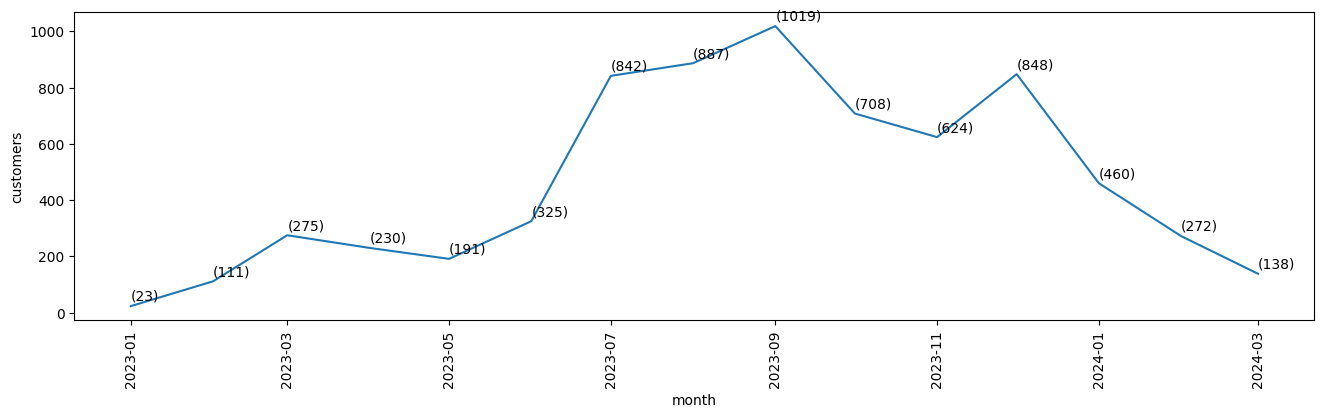

In [89]:
## New Customers and revenue generated by them
First_time_customers = First_time.groupby(by = ["month"], as_index=False).agg({"customer_id":"nunique", "total_sales":"sum"}).rename(columns={"customer_id":"customers"})
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
sns.lineplot(data = First_time_customers, x = "month", y = "customers", markers="o",ax = axs)
for i in range(len(First_time_customers)):
    plt.text(First_time_customers["month"][i], First_time_customers["customers"][i] + 20, f"({First_time_customers["customers"][i]})")
axs.tick_params(axis = 'x', rotation = 90)
plt.show()

### Return on Ad Spend

In [90]:
## Facebook Data Preprocessing
Facebook["Month_new"] = Facebook["Month"].apply(lambda x:x.split()[0])
Facebook["Month_new"] = pd.to_datetime(Facebook["Month_new"])

In [91]:
## Orders resulting in revenue
Order_Summary_NC = Order_Summary[Order_Summary["cancelled"] == "No"]
Order_Summary_NC = Order_Summary_NC.groupby(by = ["month"], as_index=False).agg({"customer_id":"nunique","total_sales":"sum"}).rename(columns = {"customer_id":"customers"})

In [92]:
## Facebook Spends and Revenue merge
Order_Summary_NC = pd.merge(Order_Summary_NC, Facebook, left_on=["month"], right_on=["Month_new"])
Order_Summary_NC = Order_Summary_NC[["month", "customers", "total_sales","Amount spent (INR)"]].rename(columns={"Amount spent (INR)":"Facebook Spends"})

In [93]:
## Google Data Preprocessing
Google_copy = Google.copy()
Google_copy["month_str"] = Google_copy["Month"].astype("str")
Google_copy["month_corr"] = Google_copy["month_str"].str.replace("2024", "01")
Google_copy["month_corr"] = Google_copy["month_corr"].apply(lambda x : x[3:5]+'-' + x[:2]+ '-' + '20'+x[-2:])
Google_copy["Month"] = pd.to_datetime(Google_copy["month_corr"])
Google_copy = Google_copy[["Month", "Amount Spent", "Clicks", "Impression"]]

In [94]:
## Revenue and Google Merge
Order_Summary_NC = pd.merge(Order_Summary_NC, Google_copy, left_on = "month", right_on="Month", how = "left")
Order_Summary_NC = Order_Summary_NC[["month", "customers", "total_sales","Facebook Spends", "Amount Spent"]].rename(columns = {"Amount Spent":"Google Spends"})

In [95]:
## Return on Ad Spends
Order_Summary_NC["ROAS"] = Order_Summary_NC["total_sales"]/(Order_Summary_NC["Facebook Spends"] + Order_Summary_NC["Google Spends"])

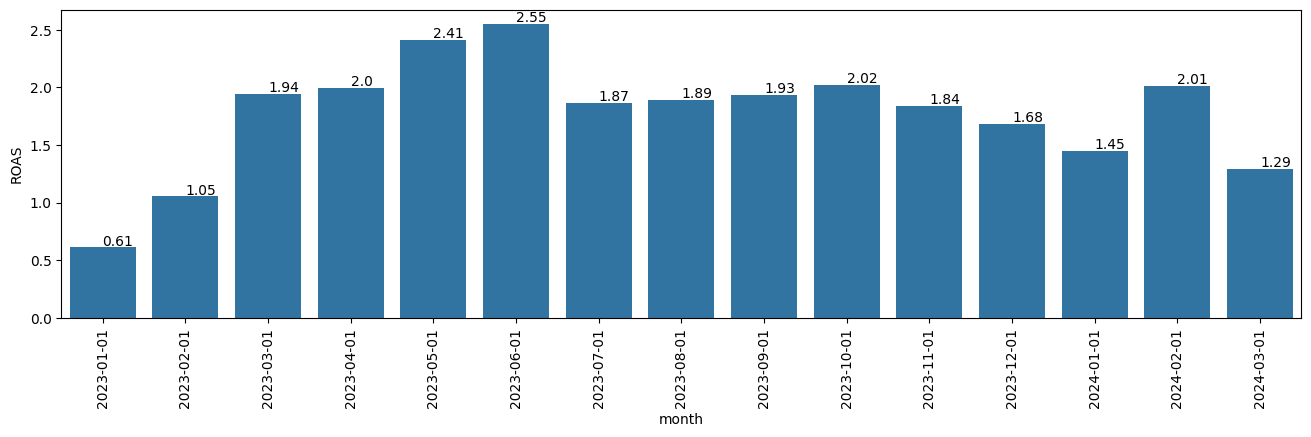

In [124]:
## Return on Ad Spends visualization
##Order_Summary_NC["month"] = Order_Summary_NC["month"].dt.strftime("%Y-%m-%d")
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
sns.barplot(data = Order_Summary_NC, x = "month", y = "ROAS", ax = axs)
for i in range(len(Order_Summary_NC)):
    plt.text(Order_Summary_NC["month"][i], Order_Summary_NC["ROAS"][i]+0.02, f"{round(Order_Summary_NC["ROAS"][i],2)}")
axs.tick_params(axis = 'x', rotation = 90)
plt.show()

### Customer Acquisition Cost

In [17]:
## Cost of acquiring new customers
First_time_CAC = pd.merge(First_time_customers, Facebook, left_on=["month"], right_on=["Month_new"])
First_time_CAC = First_time_CAC[["month", "customers", "total_sales","Amount spent (INR)"]].rename(columns={"Amount spent (INR)":"Facebook Spends"})
First_time_CAC = pd.merge(First_time_CAC, Google_copy, left_on = "month", right_on="Month", how = "left")
First_time_CAC = First_time_CAC[["month", "customers", "total_sales","Facebook Spends", "Amount Spent"]].rename(columns = {"Amount Spent":"Google Spends"})

In [18]:
First_time_CAC["CAC"] = (First_time_CAC["Facebook Spends"] + First_time_CAC["Google Spends"])/First_time_CAC["customers"]

- Customer Acuisition Cost (CAC) has increased recently, due to which, business is not growing at good rate

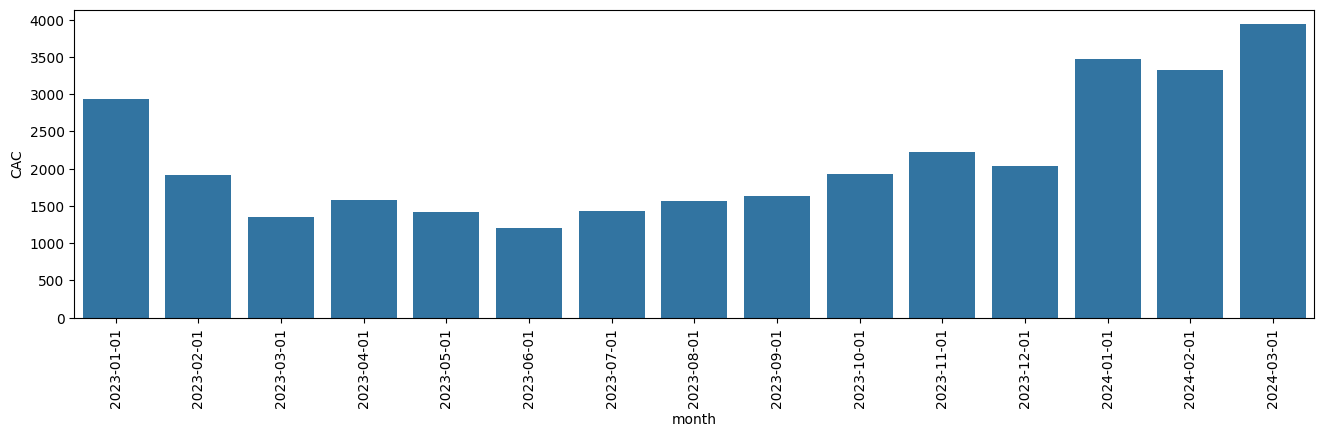

In [19]:
## Customer acquisition cost
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
sns.barplot(data = First_time_CAC, x = "month", y = "CAC", ax = axs)
axs.tick_params(axis = 'x', rotation = 90)
plt.show()

### Cancelled Customers

- High cancellation during the period of January for both the Repeating and New Customers

In [20]:
## First Time Customers
First_time_cancelled = Order_Summary[(Order_Summary["customer_type"] == 'First-time') & (Order_Summary["cancelled"] == "Yes")]
cancelled_customers = First_time_cancelled.groupby(by = ["month","customer_type"], as_index=False)["customer_id"].nunique()

## Returning Cancelled Customers
Returning_Cancelled = Order_Summary[(Order_Summary["customer_type"] == "Returning") & (Order_Summary["cancelled"] == "Yes")]
R_cancelled_cust = Returning_Cancelled.groupby(by = ["month", "customer_type"], as_index=False)["customer_id"].nunique()

In [21]:
cancelled_customers_ttl = pd.concat([cancelled_customers,R_cancelled_cust], axis = 0)

In [22]:
cancelled_customers_ttl["month"] = cancelled_customers_ttl["month"].dt.strftime("%Y-%m-%d")
cancelled_customers_ttl_pvt = cancelled_customers_ttl.pivot_table(index = "month", columns = "customer_type", values="customer_id")

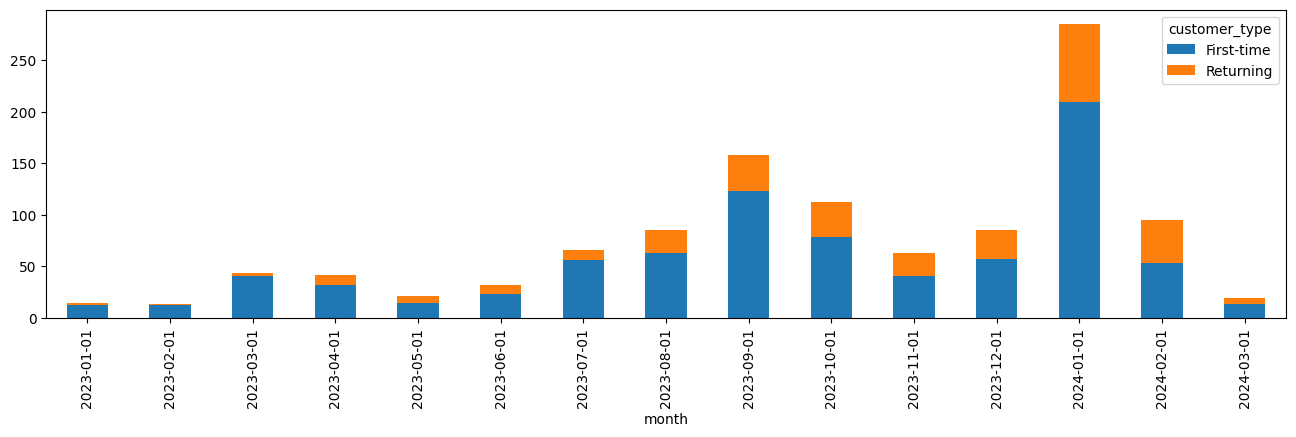

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols =1, figsize = (16,4))
cancelled_customers_ttl_pvt.plot(kind="bar", stacked=True, ax = axs)
plt.show()

### Customer Segementation based upon Recency, Frequency and Montetary value

In [24]:
## Last sale calculation
Order_Summary_filtered = Order_Summary[Order_Summary["cancelled"] == "No"][["month", "customer_type", "order_id","customer_id", "total_sales"]]
Order_Summary_RFM = Order_Summary_filtered.groupby(by = ["customer_id"], as_index = False).agg({"total_sales":"sum", "month":"max", "order_id":"nunique"})
Order_Summary_RFM["month_1"] = (Order_Summary_RFM["month"].max().year - Order_Summary_RFM["month"].dt.year)*12 + (Order_Summary_RFM["month"].max().month - Order_Summary_RFM["month"].dt.month)
## multiplied by negative because sooner somebofy ordered it is better
Order_Summary_RFM["month_1"] = -1*Order_Summary_RFM["month_1"]

In [25]:
Order_Summary_RFM = Order_Summary_RFM[["customer_id", "total_sales", "month_1","order_id"]]
Order_Summary_RFM.rename(columns={"order_id":"orders", "month_1":"Months", "total_sales":"sales"}, inplace=True)

In [26]:
RFM_Scores = Order_Summary_RFM[["sales","Months","orders"]].quantile([0.2,0.4, 0.6,0.8])
RFM_Scores

,sales,Months,orders
0.2,1350.0,-8.0,1.0
0.4,2400.0,-6.0,1.0
0.6,2400.0,-4.0,1.0
0.8,4700.0,-2.0,2.0


In [27]:
## check pd.qcut()
def RFM_assign(tbl, RFM_Scores):
    '''
    tbl : table with information about customers
    RFM_Scores : table with quartile ranges of variables
    '''
    for i in ["sales", "Months", "orders"]:
        if i == "sales":
            par = "M"
        elif i == "Months":
            par = "F"
        elif i == "orders":
            par = "R"
        tbl.loc[tbl[i] > RFM_Scores.loc[0.8,i],par] = 5
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.8,i],par] = 4
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.6,i],par] = 3
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.4,i],par] = 2
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.2,i],par] = 1

    return tbl
Order_Summary_RFM = RFM_assign(Order_Summary_RFM, RFM_Scores=RFM_Scores) 

In [28]:
## RFM calculation
Order_Summary_RFM["RFM"] = Order_Summary_RFM["R"] + Order_Summary_RFM["F"] + Order_Summary_RFM["M"]

In [29]:
## Segmentation to different groups
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] >= 13, "Group"] = "Diamond"
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] <= 13, "Group"] = "Gold"
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] <= 10, "Group"] = "Silver"
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] <= 5, "Group"] = "Bronze"

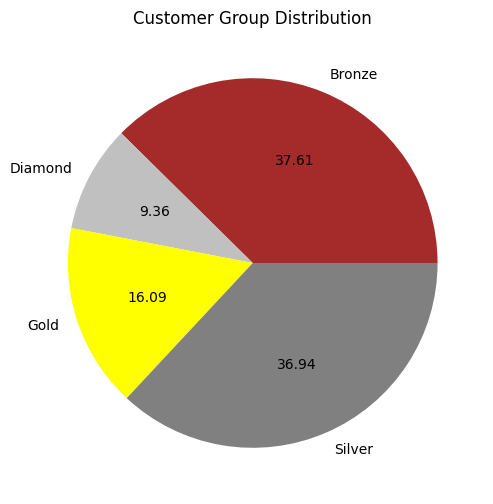

In [47]:
## Different group summary
Customer_Type_summary = Order_Summary_RFM.groupby(by = ["Group"], as_index=False)["orders"].count()
fig, axs = plt.subplots(nrows =1 , ncols = 1, figsize = (6,6))
plt.pie(data = Customer_Type_summary, x = "orders", labels ="Group", autopct='%.2f', colors=["Brown", "Silver", "Yellow", "Grey"])
plt.title("Customer Group Distribution")
plt.show()

### Click through rates for Facebook and Google

- Google has better click through rates than Facebook and Cost per click has been same. There has been less investment in Google advertising. It should be included in the plan.

In [31]:
Facebook["CTR"] = Facebook["Link clicks"]/Facebook["Impressions"]
Google_copy["CTR"] = Google_copy["Clicks"]/Google_copy["Impression"]
Facebook["CPC"] = Facebook["Amount spent (INR)"]/Facebook["Link clicks"]
Google_copy["CPC"] = Google_copy["Amount Spent"]/Google_copy["Clicks"]

In [32]:
Facebook_CTR = Facebook[["Month_new", "CTR", "CPC"]].rename(columns = {"Month_new":"Month"})
Facebook_CTR["Type"] = "Facebook"
Google_CTR = Google_copy[["Month", "CTR", "CPC"]]
Google_CTR["Type"] = "Google"
CTR_table = pd.concat([Facebook_CTR, Google_CTR], axis = 0)

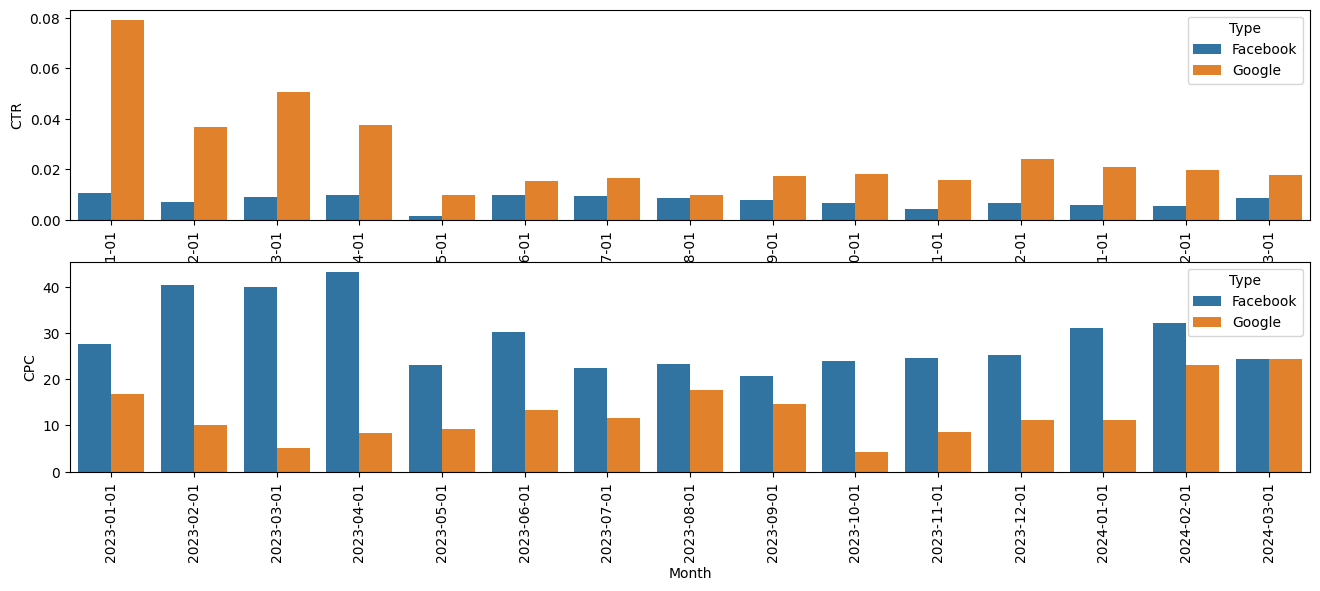

In [33]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (16,6))
sns.barplot(CTR_table, x = "Month", y = "CTR", hue = "Type", ax = axs[0])
sns.barplot(CTR_table, x = "Month", y = "CPC", hue = "Type", ax = axs[1])
axs[0].tick_params(axis = 'x', rotation = 90)
axs[1].tick_params(axis = 'x', rotation = 90)
plt.show()

In [125]:
## Amount spent is goggle is less even though it has CTR better than Facebook
Facebook_spend = Facebook[["Month_new", "Amount spent (INR)"]].rename(columns = {"Month_new":"Month", "Amount spent (INR)":"Amount Spent"})
Google_spend = Google_copy[["Month", "Amount Spent"]]
Facebook_spend["Type"] = "Facebook"
Google_spend["Type"] = "Google"
spend_table = pd.concat([Facebook_spend, Google_spend], axis = 0)

In [126]:
fig = px.bar(spend_table, x='Month', y='Amount Spent', color='Type', barmode='group')
fig.show()

### Business Problem 

- Our agency has taken over the performance marketing efforts for a Supplement Brand, a brand that parted ways with their previous agency due to dissatifaction with their declining ROAS. In the first month under your agency guidance (February), optimizations were implemented, resulting in an apparent improvement in ROAS. However, this improvement is primarily attributed to an increase in repetitive purchases, with a notable lack of new customer acquisitions. Upon reviewing the performance metrics, you observe that the cost of acquiring new customers has seemingly increased from the previous month (January), despite your agency's optimizations.

### Solutions as per analysis

- There has been increase in cancellation since the month of January. So, need to look at the Delivery funnel where the cancellation occured and what was the reason to uncrease the customers.

- Click Through Rate (CTR) and Cost Per Click (CPC) has been better in the Google Channel. So, marketing spends can be shifted through to the different channel.